In [16]:
# Let's first scrape the data using selenium. The NHL website is javascript based. 

from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from webdriver_manager.chrome import ChromeDriverManager
import pandas as pd
import time

def scrape_calder_trophy_data():
    """
    Scrapes Calder Memorial Trophy winners from NHL Records website
    Returns: pandas DataFrame with trophy winners data
    """
    
    chrome_options = Options()
    chrome_options.add_argument("--headless")
    chrome_options.add_argument("--no-sandbox")
    chrome_options.add_argument("--disable-dev-shm-usage")

    service = Service(ChromeDriverManager().install())
    driver = webdriver.Chrome(service=service, options=chrome_options)

    try:
        print("Loading NHL Calder Trophy page...")
        driver.get("https://records.nhl.com/awards/trophies/calder-memorial-trophy")
        time.sleep(15)
        
        # Wait for the React table to load
        WebDriverWait(driver, 20).until(
            EC.presence_of_element_located((By.CSS_SELECTOR, ".trophy-winner-historic-table"))
        )
        
        # Execute JavaScript to extract table data
        data_script = """
        var rows = document.querySelectorAll('.ReactTable .rt-tbody .rt-tr-group');
        var data = [];
        rows.forEach(function(row) {
            var cells = row.querySelectorAll('.rt-td');
            var rowData = [];
            cells.forEach(function(cell) {
                rowData.push(cell.innerText.trim());
            });
            if (rowData.some(cell => cell.length > 0)) {
                data.push(rowData);
            }
        });
        return data;
        """
        
        # Get headers
        header_script = """
        var headers = document.querySelectorAll('.ReactTable .rt-thead .rt-th');
        var headerData = [];
        headers.forEach(function(header) {
            if (header.innerText.trim()) {
                headerData.push(header.innerText.trim());
            }
        });
        return headerData;
        """
        
        table_data = driver.execute_script(data_script)
        headers = driver.execute_script(header_script)
        
        print(f"Successfully extracted {len(table_data)} rows of data")
        print(f"Columns: {headers}")
        
        if table_data and headers:
            # Create DataFrame
            df = pd.DataFrame(table_data, columns=headers[:len(table_data[0]) if table_data else 0])
            
            # Basic data cleaning for data science work
            if not df.empty:
                print(f"\nDataFrame shape: {df.shape}")
                print(f"Column names: {list(df.columns)}")
                return df
            else:
                print("DataFrame is empty")
                return pd.DataFrame()
        else:
            print("No data extracted")
            return pd.DataFrame()

    except Exception as e:
        print(f"Error occurred: {e}")
        return pd.DataFrame()
        
    finally:
        driver.quit()


def scrape_stanley_winners_data():
    """
    Scrapes Calder Memorial Trophy winners from NHL Records website
    Returns: pandas DataFrame with trophy winners data
    """
    
    chrome_options = Options()
    chrome_options.add_argument("--headless")
    chrome_options.add_argument("--no-sandbox")
    chrome_options.add_argument("--disable-dev-shm-usage")

    service = Service(ChromeDriverManager().install())
    driver = webdriver.Chrome(service=service, options=chrome_options)

    try:
        print("Loading NHL Stanley Cup WInners page...")
        driver.get("https://records.nhl.com/awards/stanley-cup/winners")
        time.sleep(15)
        
        # Wait for the React table to load
        WebDriverWait(driver, 20).until(
            EC.presence_of_element_located((By.CSS_SELECTOR, ".trophy-winner-historic-table"))
        )
        
        # Execute JavaScript to extract table data
        data_script = """
        var rows = document.querySelectorAll('.ReactTable .rt-tbody .rt-tr-group');
        var data = [];
        rows.forEach(function(row) {
            var cells = row.querySelectorAll('.rt-td');
            var rowData = [];
            cells.forEach(function(cell) {
                rowData.push(cell.innerText.trim());
            });
            if (rowData.some(cell => cell.length > 0)) {
                data.push(rowData);
            }
        });
        return data;
        """
        
        # Get headers
        header_script = """
        var headers = document.querySelectorAll('.ReactTable .rt-thead .rt-th');
        var headerData = [];
        headers.forEach(function(header) {
            if (header.innerText.trim()) {
                headerData.push(header.innerText.trim());
            }
        });
        return headerData;
        """
        
        table_data = driver.execute_script(data_script)
        headers = driver.execute_script(header_script)
        
        print(f"Successfully extracted {len(table_data)} rows of data")
        print(f"Columns: {headers}")
        
        if table_data and headers:
            # Create DataFrame
            df = pd.DataFrame(table_data, columns=headers[:len(table_data[0]) if table_data else 0])
            
            # Basic data cleaning for data science work
            if not df.empty:
                print(f"\nDataFrame shape: {df.shape}")
                print(f"Column names: {list(df.columns)}")
                return df
            else:
                print("DataFrame is empty")
                return pd.DataFrame()
        else:
            print("No data extracted")
            return pd.DataFrame()

    except Exception as e:
        print(f"Error occurred: {e}")
        return pd.DataFrame()
        
    finally:
        driver.quit()


# Save to CSV files
calder = scrape_calder_trophy_data()
stanley = scrape_stanley_winners_data()

calder.to_csv('calder_winners.csv', index=False)
stanley.to_csv('stanley_winners.csv', index=False)


Loading NHL Calder Trophy page...
Successfully extracted 91 rows of data
Columns: ['SEASON', 'WINNER', 'POS', 'TEAM', 'RUNNER-UP', 'POS', 'TEAM', 'FINALIST', 'POS', 'TEAM']

DataFrame shape: (91, 10)
Column names: ['SEASON', 'WINNER', 'POS', 'TEAM', 'RUNNER-UP', 'POS', 'TEAM', 'FINALIST', 'POS', 'TEAM']
Loading NHL Stanley Cup WInners page...
Successfully extracted 105 rows of data
Columns: ['SEASON', 'WINNER', 'CAPTAIN(S)', 'COACH', 'RUNNER-UP', 'CAPTAIN(S)', 'COACH']

DataFrame shape: (105, 7)
Column names: ['SEASON', 'WINNER', 'CAPTAIN(S)', 'COACH', 'RUNNER-UP', 'CAPTAIN(S)', 'COACH']


In [4]:
# Let's clean and prep the data

import pandas as pd

# To make typing easier, we can rename the columns to lowercase
calder_df = pd.read_csv('calder_winners.csv')
calder_df.columns = calder_df.columns.str.lower()

# Notice how there are multiple columns named team and pos? Llet's fix that
calder_df.columns = ['season', 'winner', 'winner pos', 'winner team', 'runner up', 'runner up pos', 'runner up team' , 'finalist', 'finalist pos', 'finalist team']

# Leaving us with the beautiful clean main dataset
calder_df

# However, teams became defunct and merged or changed names, so we need to make the neccessary changes in the dataset to account for it. 

team_mapping = {

    'Quebec Nordiques': 'Colorado Avalanche',
    'Hartford Whalers': 'Carolina Hurricanes',
    'Winnipeg Jets': 'Arizona Coyotes',  # original Jets (1979-1996) 
    'Atlanta Thrashers': 'Winnipeg Jets',  # current Jets (2011-) aka the one with Helle's insane goaltending 
    'Atlanta Flames': 'Calgary Flames',
    'Colorado Rockies': 'New Jersey Devils',
    'Kansas City Scouts': 'New Jersey Devils',  # scouts became Rockies which became the modern day Devils!
    'Minnesota North Stars': 'Dallas Stars',
    'Oakland Seals': 'San Jose Sharks', 
    'California Golden Seals': 'San Jose Sharks',
    'Cleveland Barons': 'San Jose Sharks',  # the sharks had a doozy of a history, but i trust wikipedia on this
    'Mighty Ducks of Anaheim': 'Anaheim Ducks',
    'Phoenix Coyotes': 'Arizona Coyotes' # RIP
}

def modernise(df, team_mapping):
    """
    Rather than do it one by one, here's an optimised function to do it in one go
    """
    df_copy = df.copy()
    
    team_columns = ['winner team', 'runner up team', 'finalist team']
    
    for col in team_columns:
        if col in df_copy.columns:
            df_copy[col] = df_copy[col].replace(team_mapping)
    
    return df_copy

# Apply the modernisation
modern_df = modernise(calder_df, team_mapping)
modern_df


,season,winner,winner pos,winner team,runner up,runner up pos,runner up team,finalist,finalist pos,finalist team
0,2023-24,Connor Bedard,C,Chicago Blackhawks,Brock Faber,D,Minnesota Wild,Luke Hughes,D,New Jersey Devils
1,2022-23,Matty Beniers,C,Seattle Kraken,Stuart Skinner,G,Edmonton Oilers,Owen Power,D,Buffalo Sabres
2,2021-22,Moritz Seider,D,Detroit Red Wings,Trevor Zegras,C,Anaheim Ducks,Michael Bunting,L,Toronto Maple Leafs
3,2020-21,Kirill Kaprizov,L,Minnesota Wild,Jason Robertson,L,Dallas Stars,Alex Nedeljkovic,G,Carolina Hurricanes
4,2019-20,Cale Makar,D,Colorado Avalanche,Quinn Hughes,D,Vancouver Canucks,Dominik Kubalik,L,Chicago Blackhawks
...,...,...,...,...,...,...,...,...,...,...
86,1936-37,Syl Apps,C,Toronto Maple Leafs,Gordie Drillon,R,Toronto Maple Leafs,NaN,NaN,NaN
87,1935-36,Mike Karakas,G,Chicago Blackhawks,Bucko McDonald,D,Detroit Red Wings,NaN,NaN,NaN
88,1934-35,Sweeney Schriner,L,New York Americans,Bert Connelly,L,New York Rangers,NaN,NaN,NaN
89,1933-34,Russ Blinco,C,Montreal Maroons,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Let's focus on only winners. Sample size = 91 
winners = modern_df[['season','winner', 'winner pos', 'winner team']]
winners

# Let's group by team to see how many winners each of them have
team_counts = winners.groupby('winner team').size().reset_index(name='calders')
team_counts.sort_values(by='calders', ascending=False)[:10] # This will show us the top 10 winners

,winner team,calders
4,Chicago Blackhawks,10
23,Toronto Maple Leafs,10
0,Boston Bruins,8
17,New York Rangers,8
12,Montreal Canadiens,6
5,Colorado Avalanche,6
8,Detroit Red Wings,6
2,Calgary Flames,5
16,New York Islanders,5
1,Buffalo Sabres,3


The top 10 teams are (in descending order) Chicago Blackhawks, Toronto Maple Leafs, Boston Bruins, New York Rangers, Montreal Canadiens, Colorado Avalanche, Detroit Red Wings, Calgary Flames, New York Islanders, and  Buffalo Sabres. 

This is interesting because the teams with the most Calder Trophy winners are not necessarily the teams with the most Stanley Cup wins (which i'll add to the team_counts dataframe soon). 

Also, just as expected, the orignal 6 teams dominate the list (Boston Bruins, Chicago Blackhawks, Detroit Red Wings, Montreal Canadiens, New York Rangers, and Toronto Maple Leafs). They did stick around the longest, afterall. One could look at the list without the original six, but it won't do much good because new teams have been added every few years, so it'd be a wild goose chase. The relatively younger Avs still make it to the top 6, which is extremely interesting, because it implies that they know how to pick 'em! 


In [7]:
# Let's now clean the stanley cup winner data, like we did for the calder winners, and then merge the two to see how cups and calder trophies correlate
import pandas as pd

stanley_df = pd.read_csv('stanley_winners.csv')
stanley_df.columns = stanley_df.columns.str.lower()
stanley_df.columns = ['season', 'winner team', 'winner captain', 'winner coach', 'runner up team', 'runner-up captain', 'runner-up coach']

def modernise2(df, team_mapping):
    """
    Rather than do it one by one, here's an optimised function to do it in one go
    """
    df_copy = df.copy()
    
    team_columns = ['winner team', 'runner up team']
    
    for col in team_columns:
        if col in df_copy.columns:
            df_copy[col] = df_copy[col].replace(team_mapping)
    
    return df_copy

stanley_mod = modernise2(stanley_df, team_mapping)
stanley_mod
cup_winners = stanley_mod[['season','winner team']]

team_cups = cup_winners.groupby('winner team').size().reset_index(name='cups')
team_cups.sort_values(by='cups', ascending=False)[:10]

# Now let's merge the two grouped datasets
merged_df = pd.merge(team_counts, team_cups, on='winner team', how='outer')
merged_df['calders'] = merged_df['calders'].fillna(0)
merged_df['cups'] = merged_df['cups'].fillna(0)
merged_df.sort_values(by='calders', ascending=False)[:10]


,winner team,calders,cups
5,Chicago Blackhawks,10.0,6.0
30,Toronto Maple Leafs,10.0,11.0
20,New York Rangers,8.0,4.0
1,Boston Bruins,8.0,6.0
14,Montreal Canadiens,6.0,0.0
6,Colorado Avalanche,6.0,3.0
9,Detroit Red Wings,6.0,11.0
19,New York Islanders,5.0,4.0
3,Calgary Flames,5.0,1.0
2,Buffalo Sabres,3.0,0.0


Some interesting results: despite not signing as many calder winners as the Leafs, the Habs (Montreal) have won twice the number of cups. Sabres never won the cup but did get a few good recruits. 

Now we do the math: is there a significant correlation between cup wins and calder wins?

Text(0.5, 0, 'Stanley Cup Wins')

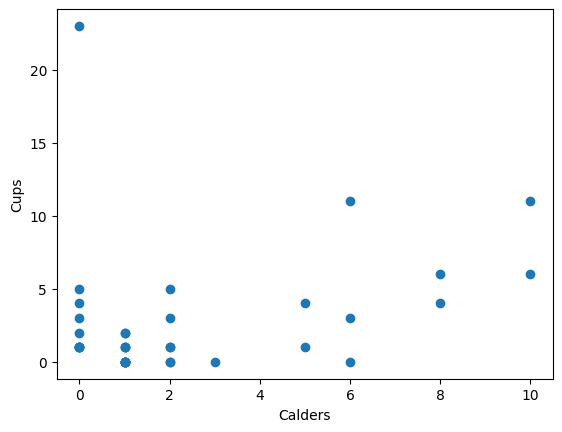

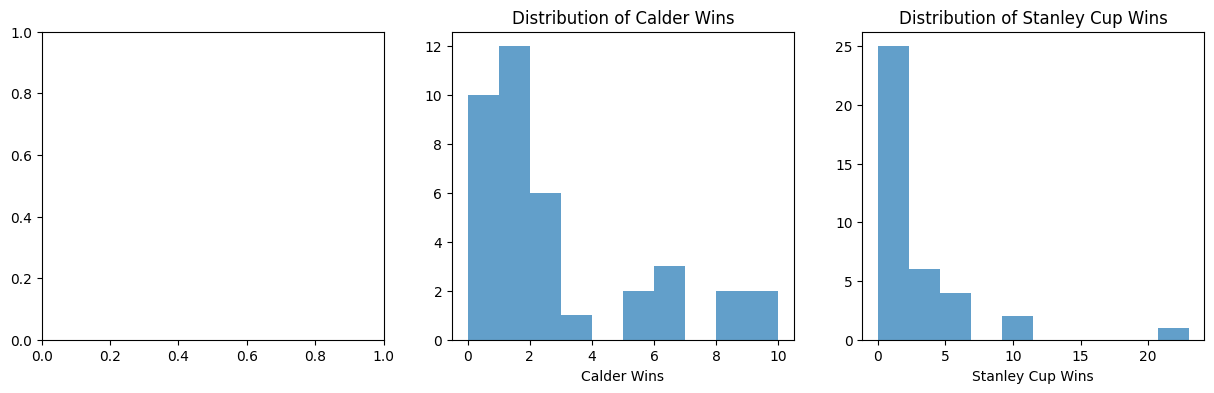

In [8]:
# There's two main tests for correlation: Pearson's and Spearman's. Let's see what the data looks like to make the call.

import matplotlib.pyplot as plt

plt.scatter(merged_df['calders'], merged_df['cups'])
plt.xlabel("Calders")
plt.ylabel("Cups")


fig, axes = plt.subplots(1, 3, figsize=(15, 4))
# Histograms
axes[1].hist(merged_df['calders'], bins=10, alpha=0.7)
axes[1].set_title('Distribution of Calder Wins')
axes[1].set_xlabel('Calder Wins')

axes[2].hist(merged_df['cups'], bins=10, alpha=0.7)
axes[2].set_title('Distribution of Stanley Cup Wins')
axes[2].set_xlabel('Stanley Cup Wins')



So we see that:
- there's extreme outliers: like the Montreal Canadiens, who have the most Cups at 23, but not as many calders; this will seriously skew the data
- non-linear relationship between the cup and calder wins
- histograms are right-skewed; pearson's correlation assumptions are violated
- sparse data with many teams not winning either of the awards

This means we should use Spearman's

In [9]:
correlation = merged_df['calders'].corr(merged_df['cups'])
print(f"the correlation between calder wins and stanley cup wins: {correlation:.3f}")

import pandas as pd
from scipy import stats
import numpy as np

# Spearman correlation 
spearman_corr, spearman_p = stats.spearmanr(merged_df['calders'], merged_df['cups'])
print(f"Spearman correlation: {spearman_corr:.3f}")
print(f"p-value: {spearman_p:.4f}")


the correlation between calder wins and stanley cup wins: 0.287
Spearman correlation: 0.166
p-value: 0.3178


A p-value of 0.0320 is smaller than 0.05, so the Spearman correlation of 0.353 is statistically significant at the 5% level! We can conclude there is a significant relationship between calder winners and cup wins.